In [58]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.centrality as centrality

In [59]:
def loop(episode):
    with open(f'data/starwars-episode-{episode}-interactions-allCharacters.json') as f:
        data = json.load(f)
    nodes = [ node['name'] for node in data["nodes"] ]
    edges = [ (nodes[link['source']], nodes[link['target']]) for link in data["links"] ]
    G = nx.Graph()
    for node in nodes:
        G.add_node(node)
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    plt.figure(figsize=(30,15))
    plt.subplot(121)
    nx.draw(G, with_labels=True)
    return sorted(centrality.betweenness_centrality(G).items(), key = lambda x: x[1])[::-1]

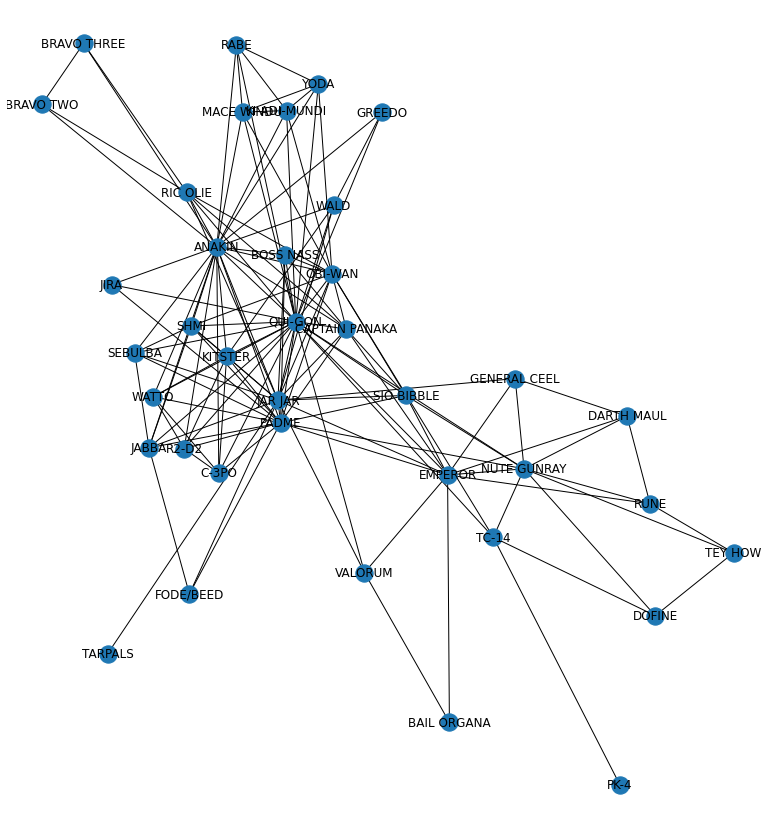

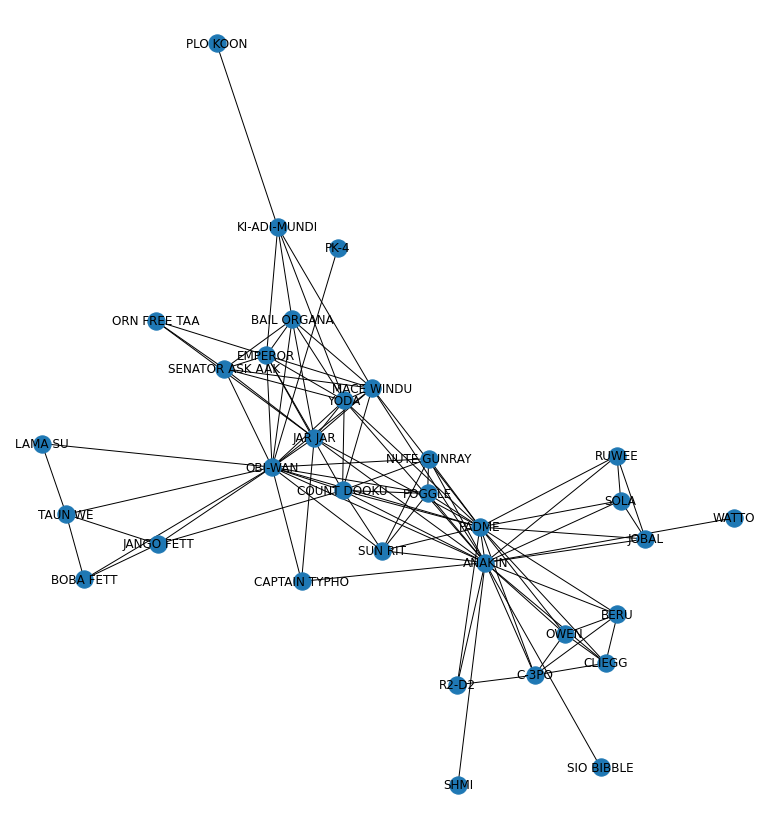

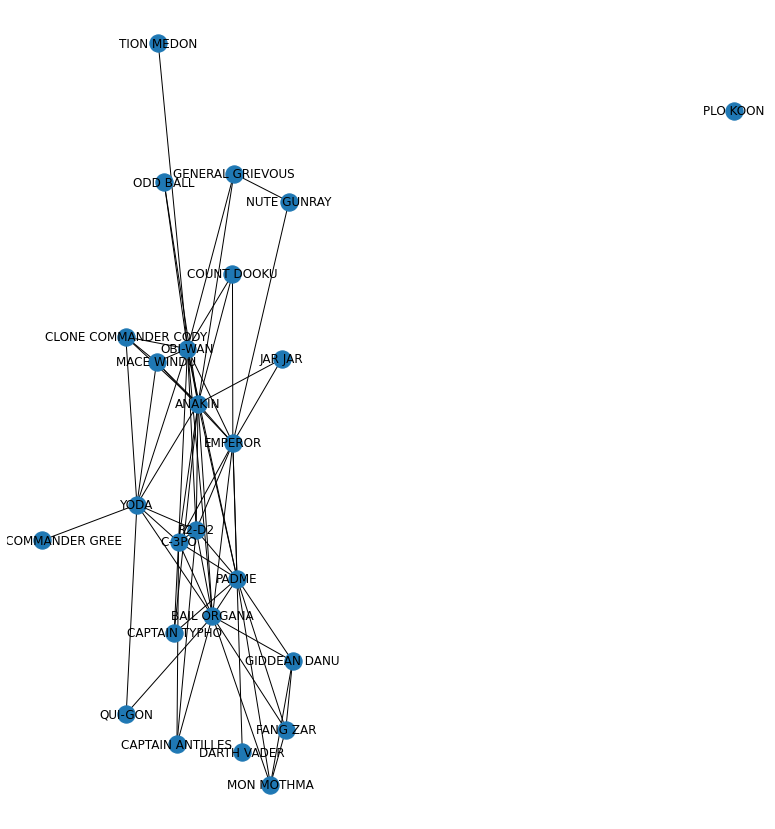

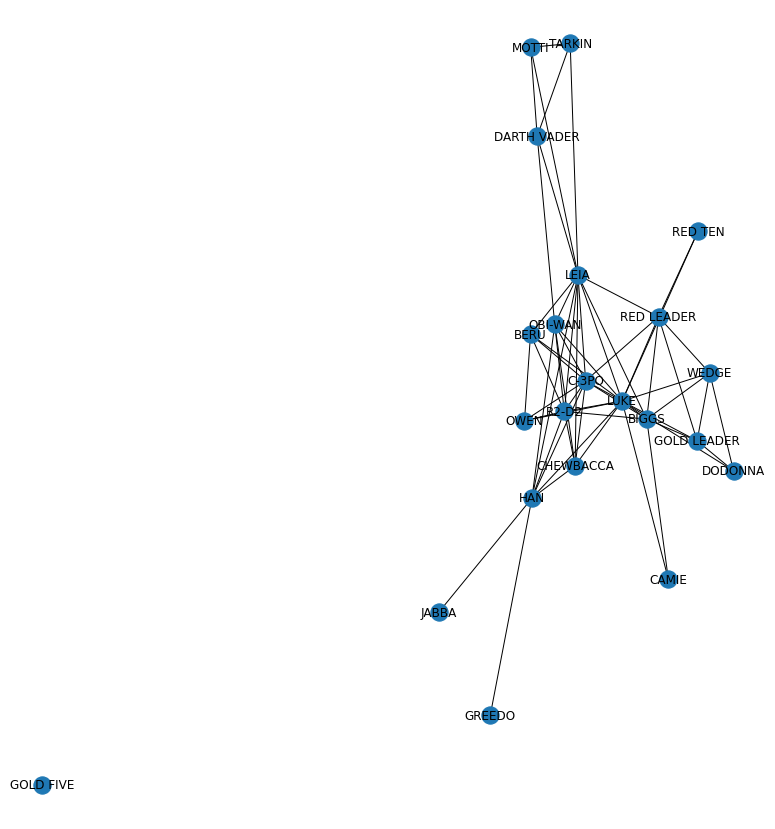

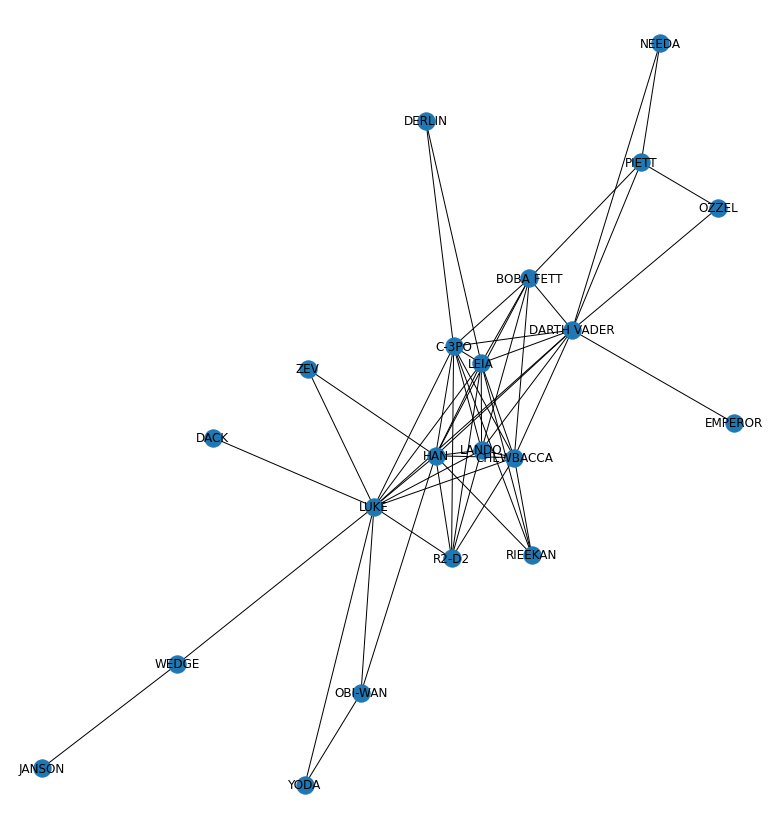

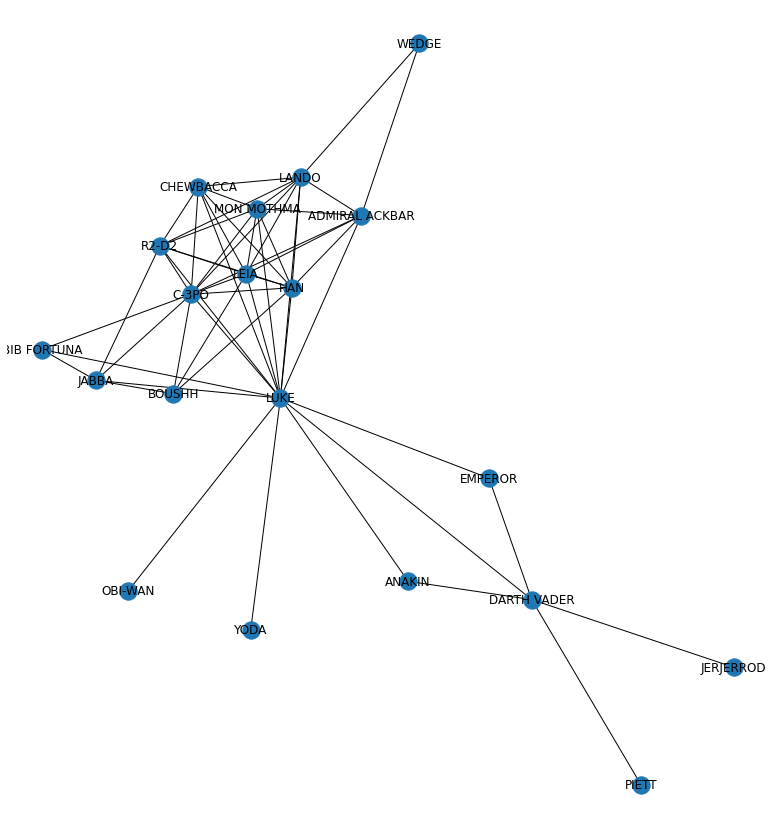

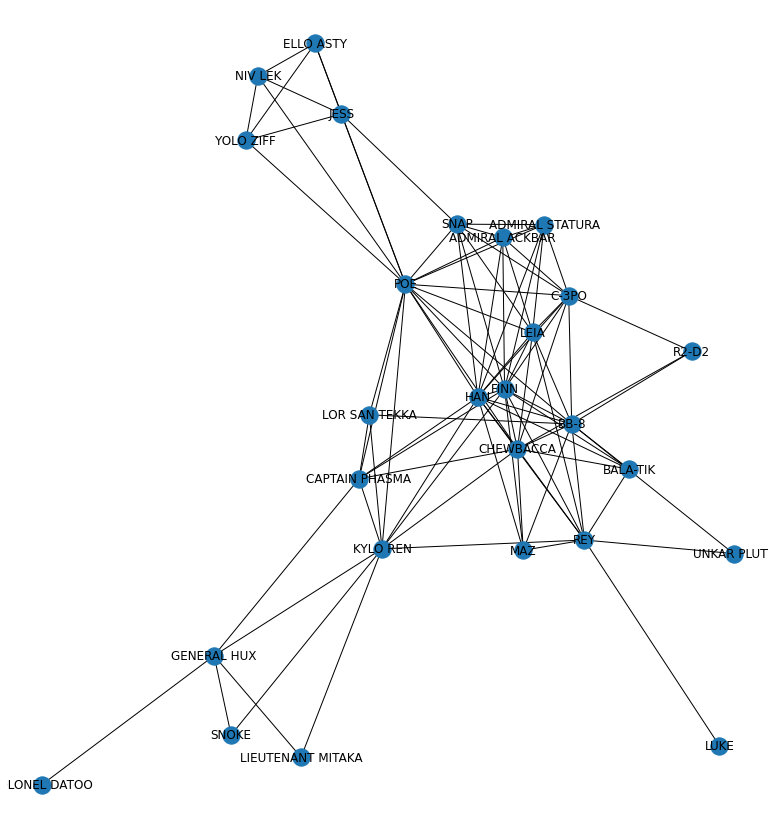

In [61]:
betweenness = []
for i in range(1,8):
    betweenness.append(loop(i))

In [63]:
for characters in betweenness:
    print(characters[:5])

[('QUI-GON', 0.3226135226135226), ('ANAKIN', 0.16988362821696157), ('JAR JAR', 0.14583615000281666), ('NUTE GUNRAY', 0.1254313837647171), ('PADME', 0.10342138675472008)]
[('ANAKIN', 0.3833822091886608), ('OBI-WAN', 0.31480109272447976), ('PADME', 0.1789467253176931), ('KI-ADI-MUNDI', 0.0625), ('JAR JAR', 0.06213037634408606)]
[('OBI-WAN', 0.18631815044858524), ('ANAKIN', 0.1847481021394065), ('EMPEROR', 0.18323844030365768), ('BAIL ORGANA', 0.1818754313319531), ('YODA', 0.11592477570738441)]
[('LUKE', 0.3223922902494331), ('LEIA', 0.2304988662131519), ('HAN', 0.1761904761904762), ('BIGGS', 0.041666666666666664), ('C-3PO', 0.04064625850340136)]
[('LUKE', 0.41621781727044893), ('DARTH VADER', 0.3246753246753247), ('HAN', 0.11175894281157435), ('WEDGE', 0.09999999999999999), ('C-3PO', 0.07398951925267716)]
[('LUKE', 0.5968810916179338), ('DARTH VADER', 0.20760233918128654), ('C-3PO', 0.06423001949317739), ('LANDO', 0.058089668615984406), ('ADMIRAL ACKBAR', 0.04327485380116959)]
[('POE', 0